In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [5]:
df.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df.shape

(270, 15)

In [7]:
df = df.drop("index",axis=1)

In [8]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [9]:
df["FBS over 120"].value_counts()

0    230
1     40
Name: FBS over 120, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LIS\AppData\Local\Temp\ipykernel_11640\2153386462.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")


<AxesSubplot: >

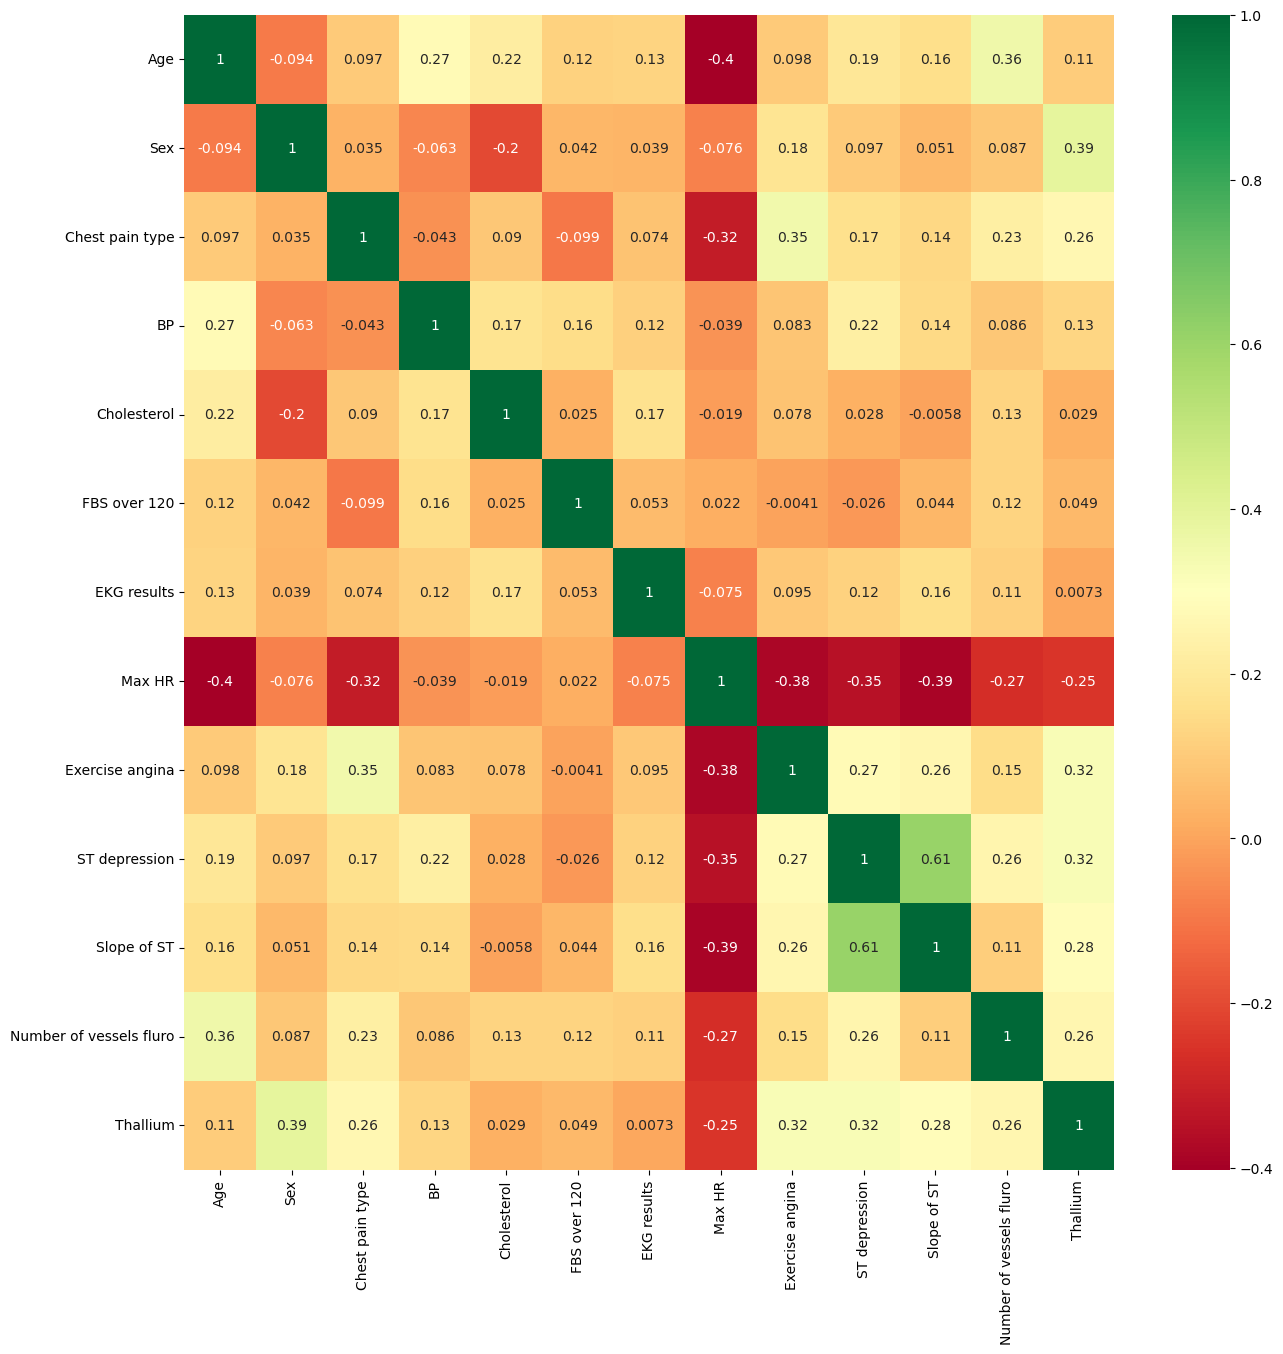

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Sex'}>,
        <AxesSubplot: title={'center': 'Chest pain type'}>,
        <AxesSubplot: title={'center': 'BP'}>],
       [<AxesSubplot: title={'center': 'Cholesterol'}>,
        <AxesSubplot: title={'center': 'FBS over 120'}>,
        <AxesSubplot: title={'center': 'EKG results'}>,
        <AxesSubplot: title={'center': 'Max HR'}>],
       [<AxesSubplot: title={'center': 'Exercise angina'}>,
        <AxesSubplot: title={'center': 'ST depression'}>,
        <AxesSubplot: title={'center': 'Slope of ST'}>,
        <AxesSubplot: title={'center': 'Number of vessels fluro'}>],
       [<AxesSubplot: title={'center': 'Thallium'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

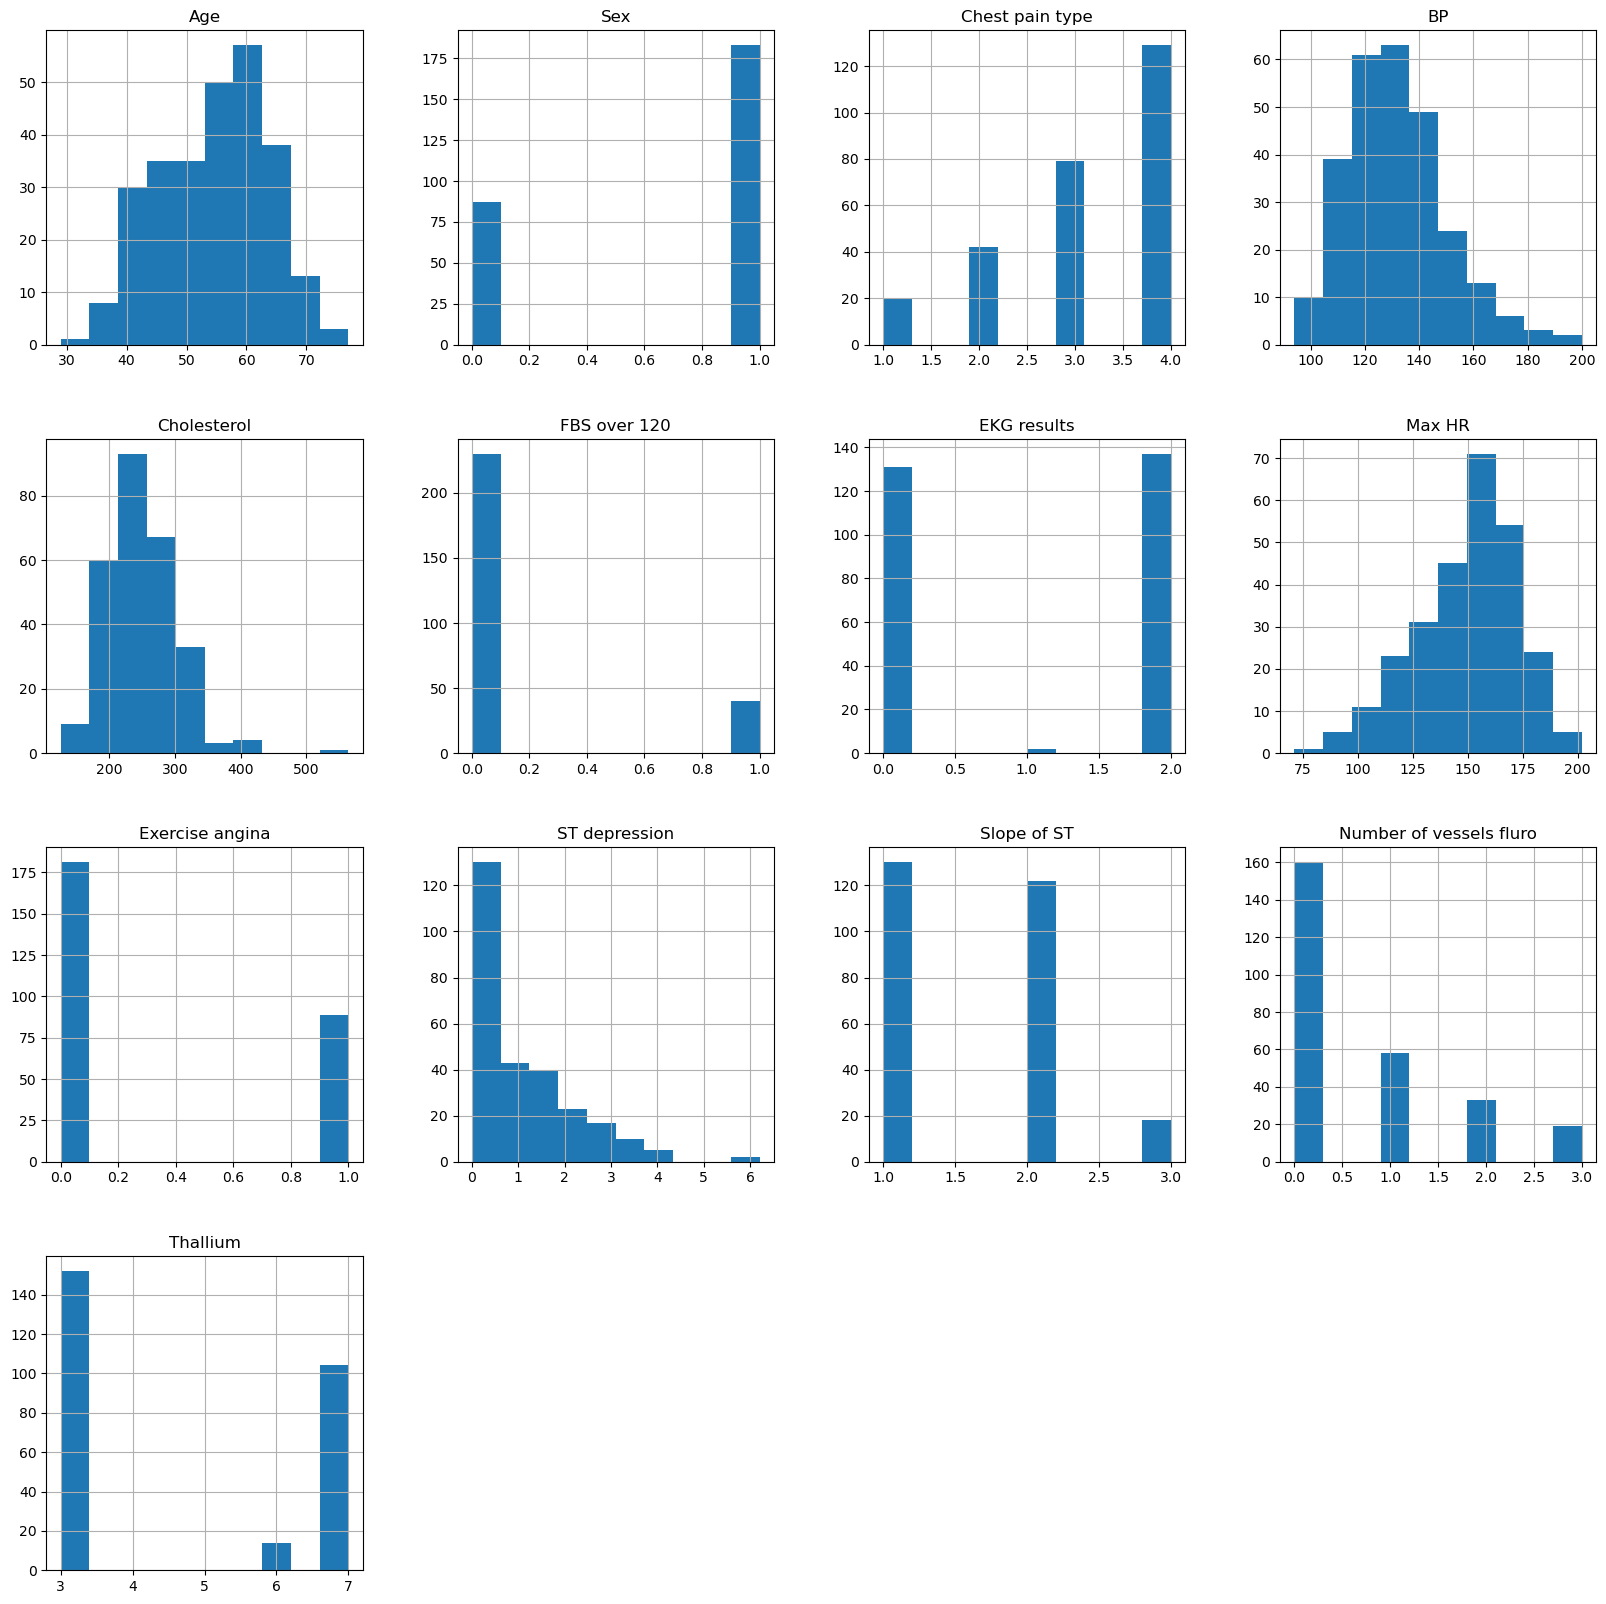

In [12]:
df.hist(figsize=(20,20))

In [13]:
df["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [14]:
df = df.drop("Max HR",axis=1)

In [15]:
x = df.drop("Heart Disease",axis=1)

In [16]:
y = df["Heart Disease"]

In [17]:
x.shape

(270, 12)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
obj = MinMaxScaler()

In [20]:
model1 = obj.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=15)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
obj_ = RandomForestClassifier(n_estimators=200)

In [25]:
model = obj_.fit(xtrain,ytrain)

In [26]:
predc = model.predict(xtest)

In [27]:
predc

array(['Presence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_ = accuracy_score(ytest,predc)

In [30]:
accuracy_

0.7647058823529411

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
con = confusion_matrix(ytest,predc)

Text(0.5, 23.52222222222222, 'Predicted Values')

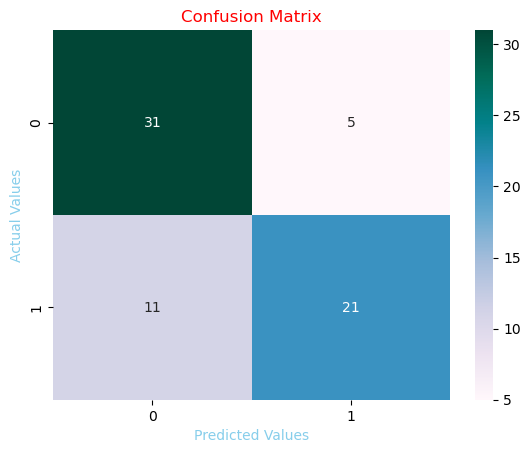

In [33]:
heatmap_ = sns.heatmap(pd.DataFrame(con),annot=True,cmap="PuBuGn",fmt="g")
plt.title("Confusion Matrix",color="red")
plt.ylabel("Actual Values",color=("skyblue"))
plt.xlabel("Predicted Values",color=("skyblue"))

In [34]:
from sklearn.metrics import classification_report

In [35]:
class_ = classification_report(ytest,predc)

In [36]:
print(class_)

              precision    recall  f1-score   support

     Absence       0.74      0.86      0.79        36
    Presence       0.81      0.66      0.72        32

    accuracy                           0.76        68
   macro avg       0.77      0.76      0.76        68
weighted avg       0.77      0.76      0.76        68

